In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [21]:
%store -r df

In [134]:
df.head(10)

,Year,Type,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species,original order,Shark Type
0,2018.0,Boating,USA,Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,white shark,6303.0,white
1,2018.0,Unprovoked,USA,Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,NaN,6302.0,NaN
2,2018.0,Invalid,USA,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,NaN,6301.0,NaN
3,2018.0,Unprovoked,AUSTRALIA,Surfing,male,M,NaN,Minor injury to lower leg,N,2 m shark,6300.0,NaN
4,2018.0,Provoked,MEXICO,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"tiger shark, 3m",6299.0,tiger
6,2018.0,Unprovoked,BRAZIL,Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,tiger shark,6297.0,tiger
7,2018.0,Unprovoked,USA,Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,"lemon shark, 3'",6296.0,lemon
8,2018.0,Unprovoked,USA,Walking,Cody High,M,15,Lower left leg bitten,N,"bull shark, 6'",6295.0,bull
9,2018.0,Unprovoked,USA,Standing,male,M,12,Minor injury to foot,N,NaN,6294.0,NaN
10,2018.0,Provoked,AUSTRALIA,Feeding sharks,male,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,grey reef shark,6293.0,grey


***Shark attack fatality***

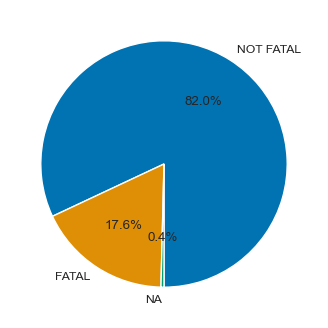

In [147]:
fatal_count = df['Fatal (Y/N)'].value_counts()

plt.figure(figsize=(4, 4))

sns.set_palette("colorblind")

plt.pie(fatal_count, labels=["NOT FATAL", "FATAL", "NA"], autopct='%1.1f%%', startangle=270);

plt.show()

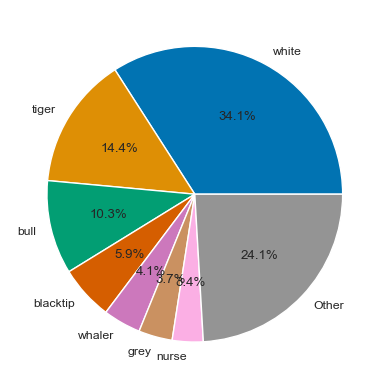

In [151]:
percentages = species_counts / species_counts.sum() * 100

most_common = percentages[percentages >= 3]
other = percentages[percentages < 3].sum()

most_common['Other'] = other

sns.set_palette("colorblind")


plt.pie(most_common, labels = most_common.index, autopct='%1.1f%%', startangle=0);

***Common species and fatality***

In [118]:
df_common = df[df["Shark Type"].isin(species_most.index)]

sns.set(font_scale = 0.7)

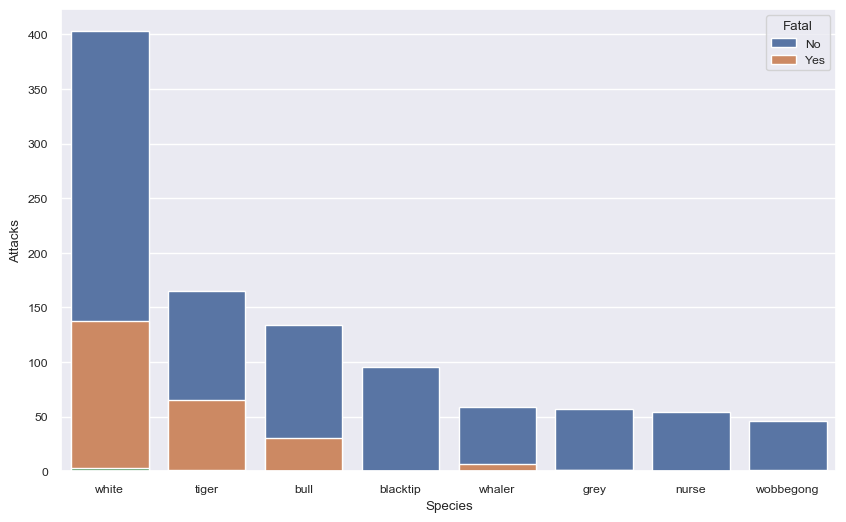

In [126]:
plt.figure(figsize=(10, 6)) 

sns.countplot(x = "Shark Type", hue = "Fatal (Y/N)", data = df_common, dodge = False,  
              order = df_common["Shark Type"].value_counts().index);

plt.xlabel('Species')

plt.ylabel("Attacks")

plt.legend(title='Fatal', loc='upper right', labels=['No', 'Yes'])

plt.show()

***Countries with most attacks and fatality***

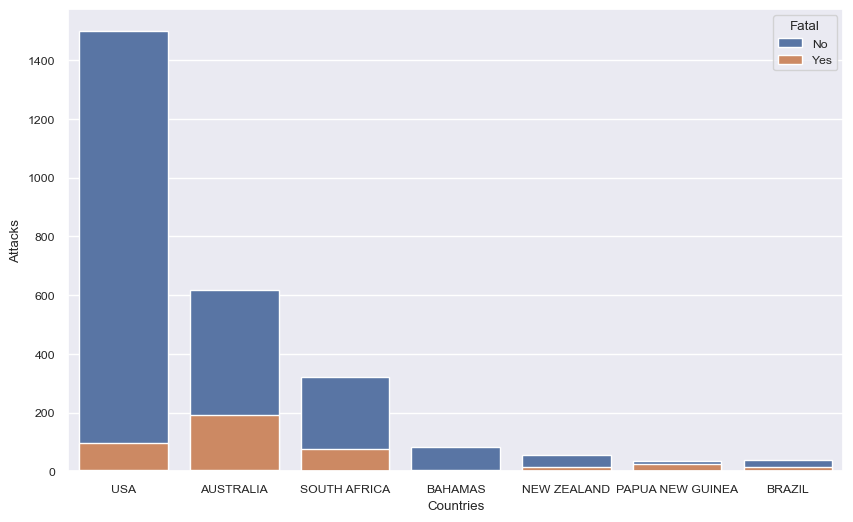

In [128]:
sns.set(font_scale = 0.8)

countries_count = df["Country"].value_counts()

countries_most = countries_count.head(7)

df_countries = df[df["Country"].isin(countries_most.index)]

plt.figure(figsize=(10, 6)) 

sns.countplot(x='Country', hue = "Fatal (Y/N)", data=df_countries, dodge = False,
              order = df_countries["Country"].value_counts().index)

plt.xlabel('Countries')

plt.ylabel("Attacks")

plt.legend(title='Fatal', loc='upper right', labels=['No', 'Yes'])

plt.show()

***Most common reported species in Australia***

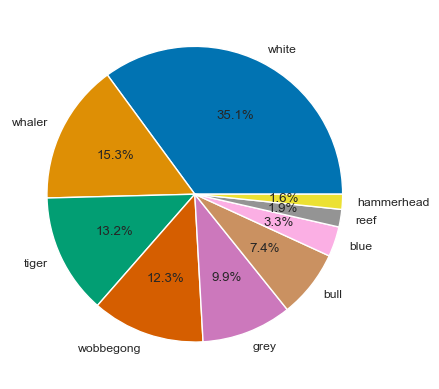

In [160]:
filtered_aus = df[df['Country'] == "AUSTRALIA"]


shark_types_aus = filtered_aus['Shark Type'].value_counts()




plt.pie(shark_types_aus.head(9), labels = shark_types_aus.head(9).index, autopct='%1.1f%%', startangle=0);

plt.show()

